In [0]:
import sys
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploads = files.upload()

In [0]:
pd.set_option('display.max_rows', 100)
data = pd.read_csv('train_data.csv')
data.head()
#find the medium then replace the missing values with the median
Lotmedian = data['LotFrontage'].median()

data['MasVnrArea'] = data['LotFrontage'].fillna(Lotmedian, inplace=True)
data['MasVnrType'] = data['MasVnrType'].fillna("None")
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['Alley'] = data['Alley'].fillna("NoAlley")
data['BsmtQual'] = data['BsmtQual'].fillna("NoBsmt")
data['BsmtCond'] = data['BsmtCond'].fillna("NoBsmt")
data['BsmtExposure'] = data['BsmtExposure'].fillna("NoBsmt")
data['BsmtFinType1'] = data['BsmtFinType1'].fillna("NoBsmt")
data['BsmtFinType2'] = data['BsmtFinType2'].fillna("NoBsmt")
data['FireplaceQu'] = data['FireplaceQu'].fillna("NoFireplace")
data['GarageType'] = data['GarageType'].fillna("NoGarage")
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['GarageFinish'] = data['GarageFinish'].fillna("NoGarage")
data['GarageQual'] = data['GarageQual'].fillna("NoGarage")
data['GarageCond'] = data['GarageCond'].fillna("NoGarage")
data['PoolQC'] = data['PoolQC'].fillna("NoPool")
data['Fence'] = data['Fence'].fillna("NoFence") 
data['MiscFeature'] = data['MiscFeature'].fillna("NoMiscFeature")

#For now let me replace the electrical with None
data['Electrical'] = data['Electrical'].fillna("SBrkr")
data = data.drop(columns=['Id'], axis=1)
#check for null values
data.isnull().sum()

In [0]:
#Assigning the scales
nominal=['SaleCondition','SaleType','MiscFeature','PavedDrive','GarageType','CentralAir','Heating','Foundation','MasVnrType','Exterior2nd','Exterior1st','RoofMatl',
         'RoofStyle','Neighborhood','LotConfig','LandContour','Alley','Street']
ordinal=['Fence','PoolQC','GarageCond','GarageQual','GarageFinish','FireplaceQu','Functional','KitchenQual','Electrical','HeatingQC','BsmtFinType2','BsmtFinType1','BsmtExposure',
         'BsmtCond','BsmtQual','ExterCond','ExterQual','HouseStyle','BldgType','Condition2','Condition1','LandSlope','Utilities','LotShape','MSZoning']
ratio=['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','GarageArea','GarageCars','Fireplaces','TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr',
       'HalfBath','FullBath','BsmtHalfBath','BsmtFullBath','GrLivArea','LowQualFinSF','2ndFlrSF','1stFlrSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','MasVnrArea',
       'LotArea','LotFrontage']
target=['SalePrice']

In [62]:
#preprocessing the data
categorical_data=data.select_dtypes(include=['object']).copy()
column_names=list(categorical_data.columns)
categorical_data.head() 

for feature in column_names:
  categorical_data[feature]=categorical_data[feature].astype('category')
for feature in ordinal:
  categorical_data[feature]=categorical_data[feature].cat.codes
categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,Pave,NoAlley,3,Lvl,0,Inside,0,CollgCr,2,2,0,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,4,PConc,2,4,3,2,6,GasA,0,Y,4,2,6,3,Attchd,2,5,5,Y,3,4,NoMiscFeature,WD,Normal
1,3,Pave,NoAlley,3,Lvl,0,FR2,0,Veenker,1,2,0,2,Gable,CompShg,MetalSd,MetalSd,None,3,4,CBlock,2,4,1,0,6,GasA,0,Y,4,3,6,5,Attchd,2,5,5,Y,3,4,NoMiscFeature,WD,Normal
2,3,Pave,NoAlley,0,Lvl,0,Inside,0,CollgCr,2,2,0,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,4,PConc,2,4,2,2,6,GasA,0,Y,4,2,6,5,Attchd,2,5,5,Y,3,4,NoMiscFeature,WD,Normal
3,3,Pave,NoAlley,0,Lvl,0,Corner,0,Crawfor,2,2,0,5,Gable,CompShg,Wd Sdng,Wd Shng,None,3,4,BrkTil,4,1,3,0,6,GasA,2,Y,4,2,6,2,Detchd,3,5,5,Y,3,4,NoMiscFeature,WD,Abnorml
4,3,Pave,NoAlley,0,Lvl,0,FR2,0,NoRidge,2,2,0,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,4,PConc,2,4,0,2,6,GasA,0,Y,4,2,6,5,Attchd,2,5,5,Y,3,4,NoMiscFeature,WD,Normal


In [0]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
data_copy=categorical_data.copy()
data_copy = pd.concat([pd.get_dummies(data_copy[nominal]),data_copy],axis=1) 
data_copy.drop(nominal,axis=1,inplace=True)
#data_copy
new_data = pd.concat([data_copy,data[ratio],data['OverallCond'],data['OverallQual'],data['MSSubClass'],data['YrSold'],data['MoSold'],data['GarageYrBlt'],data['YearRemodAdd'],
                      data['YearBuilt'],data[target]],axis=1)
new_data

In [74]:
all_features = list(new_data.columns)
all_features
X = new_data.loc[:,all_features].values
y = new_data.loc[:,["SalePrice"]].values
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [0]:
X = StandardScaler().fit_transform(X)
X

In [0]:
#PCA with 90 % variance means the dimesions are reduced to 108 from 189
#pca = PCA(0.90)
#pca.fit_transform(X)
#find all components on the 90 % variance
#pca.n_components_
#PCA with 2 components
pca = PCA(n_components=2)
pc_s = pca.fit_transform(X)

pca_data = pd.DataFrame(pc_s,columns=['PC1','PC2'])
final_data = pd.concat([pca_data,data[target]],axis=1)
final_data

In [0]:
pca.explained_variance_ratio_

In [0]:
X = final_data.drop('SalePrice',1)
y = final_data['SalePrice']



In [0]:
final_data_array = final_data.to_numpy()
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X,Y = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))


In [0]:

final_train = np.c_[final_data_array[:,0],final_data_array[:,1]]
final_train
regressor = LassoCV()
regressor.fit(final_data.drop('SalePrice',1),final_data['SalePrice'])

#regressor.intercept_
weight_1 = regressor.coef_[0]
weight_2 = regressor.coef_[1]
b = regressor.intercept_
#General linear equal
Z = (weight_1 * X) + (weight_2 * Y) + b


Text(0.5, 0.92, '3D Plane of best fit')

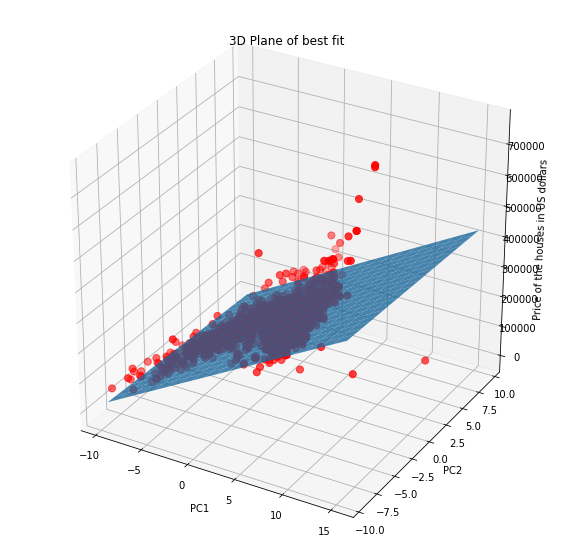

In [83]:
fig1 = plt.figure(figsize=(10,10))
ax = fig1.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1,cstride=1, alpha=0.8)
ax.scatter(final_data_array[:,0], final_data_array[:,1],final_data_array[:,2], c='r', s=50)

plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('Price of the houses in US dollars')
ax.set_title("3D Plane of best fit")